*Write a python program to*
- Gather the daily high, low, and closing prices for McDonald's stock (ticker symbol MCD) for January 2004 through July 2005 from Yahoo! Finance or another electronic source.
- Calculate 10-day and 60-day SMAs. Plot these two curves with a bar chart of the stock prices.
- Compare and contrast the 10-day and the 60-day SMA.
- Explain the relationship between the market trend and the 60-day SMA during the following periods: •May 2004-October 2004 •October 2004-May 2005 •May 2005-July 2005
- Draw the moving average oscillator of the price chart.
- Bollinger Band is a band plotted 1.5 standard deviations away from a simple moving average. Calculate the Bollinger bands of 10-day simple moving average for Mac Donald share.
- Develop a trading strategy based on the relation between price and Bollinger Bands. Graphically represent the risk-return profile of such a trading strategy

In [43]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
sns.set_style('white')
%matplotlib inline

####

## 1. Download 15 yrs DJIA
start = datetime.datetime(2004, 1, 1)
end = datetime.datetime(2005, 7, 1)

df = data.DataReader('MCD',  'google', start, end)
#df = df['Close']
#returns = np.log(data / data.shift(1))

###
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2004-01-02,24.90,25.03,24.66,24.79,4576000
2004-01-05,24.81,25.10,24.80,25.03,5455100
2004-01-06,25.02,25.48,24.96,25.33,5231400
2004-01-07,25.33,25.45,25.13,25.41,6676100
2004-01-08,25.50,25.50,25.50,25.50,0


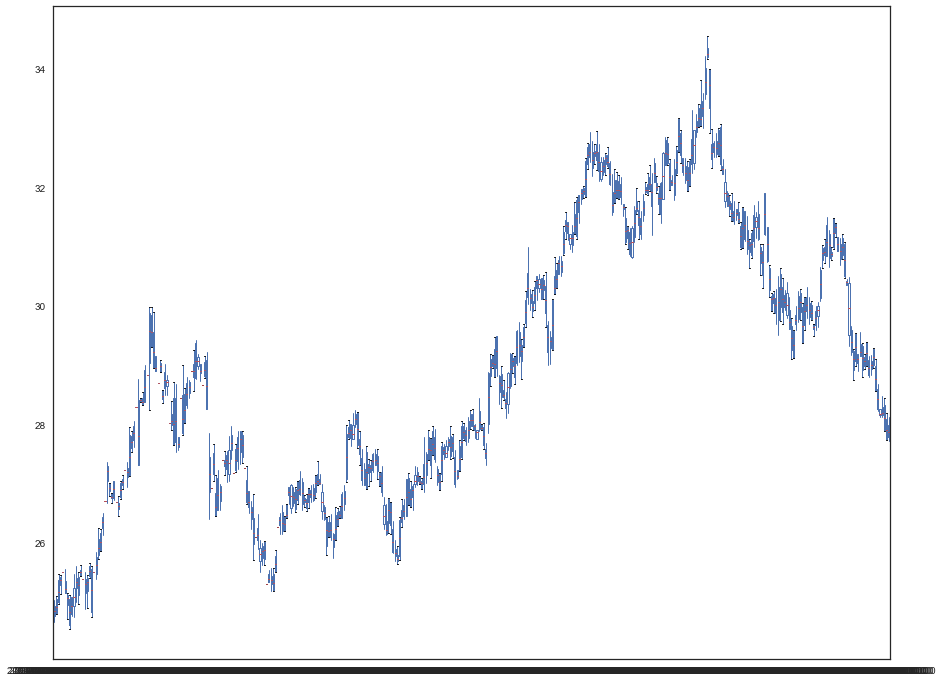

In [44]:
df[["Open", "High", "Low", "Close"]].transpose().plot.box(figsize=(15, 12))

In [45]:
df['SMA30'] = df['Close'].rolling(30).mean()
df['SMA60'] = df['Close'].rolling(60).mean()

df.tail()

,Open,High,Low,Close,Volume,SMA30,SMA60
Date,,,,,,,
2005-06-27,28.20,28.46,28.13,28.16,3617400,29.903000,30.086333
2005-06-28,28.16,28.48,28.12,28.24,5165100,29.848333,30.040500
2005-06-29,28.30,28.44,27.88,27.91,6386800,29.779667,29.985500
2005-06-30,28.05,28.20,27.74,27.75,8086700,29.685333,29.923167
2005-07-01,27.81,28.13,27.72,27.94,4487000,29.584333,29.864333


**Calculate 10-day and 60-day SMAs. Plot these two curves with a bar chart of the stock prices.**
- Compare and contrast the 10-day and the 60-day SMA

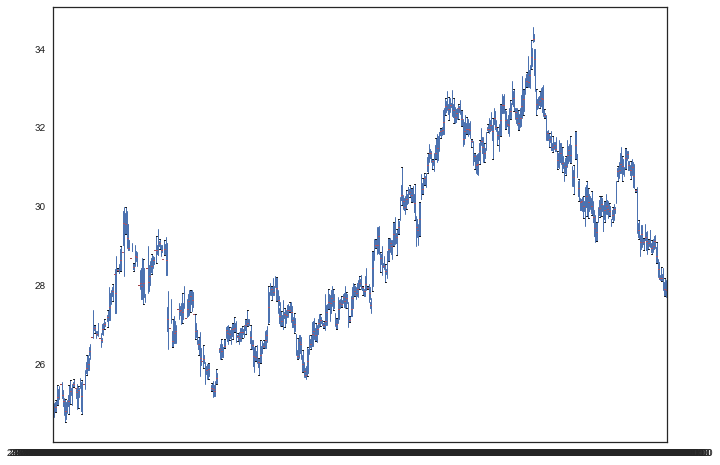

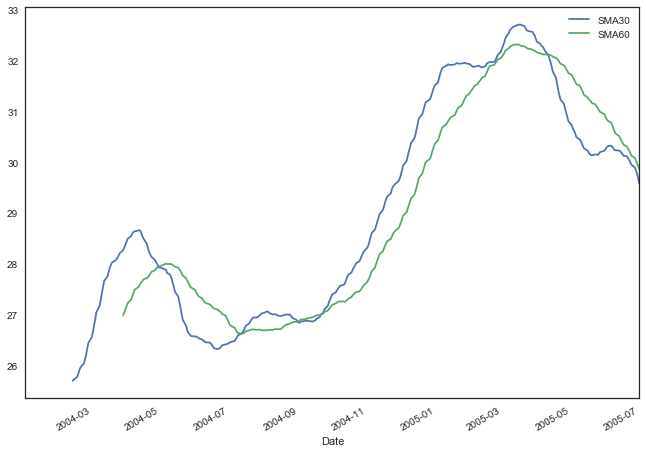

In [46]:
df[["Open", "High", "Low", "Close"]].transpose().plot.box(figsize=(11, 8))
df[["SMA30", "SMA60"]].plot(figsize=(11, 8))

**Explain the relationship between the market trend and the 60-day SMA during the following periods:**
- May 2004-October 2004 - Moving Avgs Cross over and slope down
- October 2004-May 2005 - Moving Avgs Cross Up and slope up
- May 2005-July 2005    - Moving Avgs Cross down slope down

Draw the moving average oscillator of the price chart.

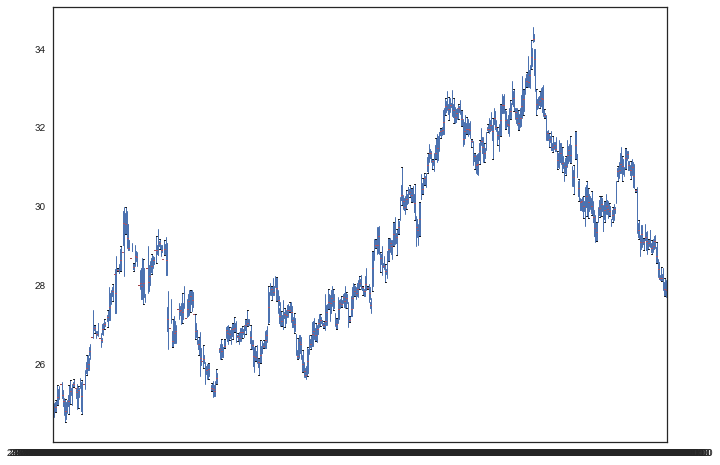

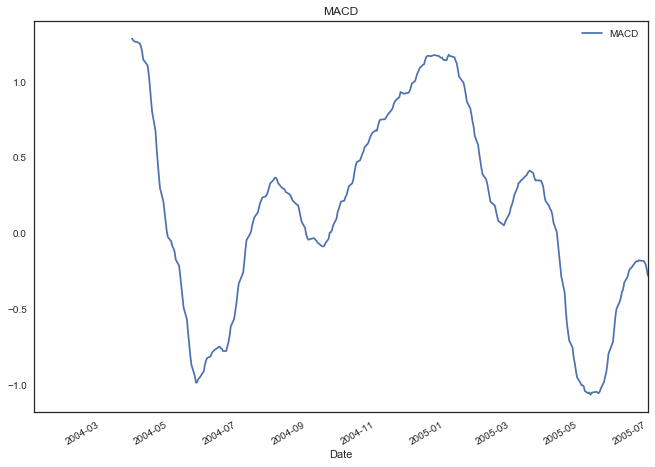

In [47]:
df['MACD'] = (df['SMA30'] - df['SMA60'])
df[["Open", "High", "Low", "Close"]].transpose().plot.box(figsize=(11, 8))
df.plot(y= ['MACD'], title='MACD', figsize=(11, 8))

Bollinger Band is a band plotted 1.5 standard deviations away from a simple moving average. Calculate the Bollinger bands of 10-day simple moving average for Mac Donald share.
Develop a trading strategy based on the relation between price and Bollinger Bands. Graphically represent the risk-return profile of such a trading strategy

C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()

C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()



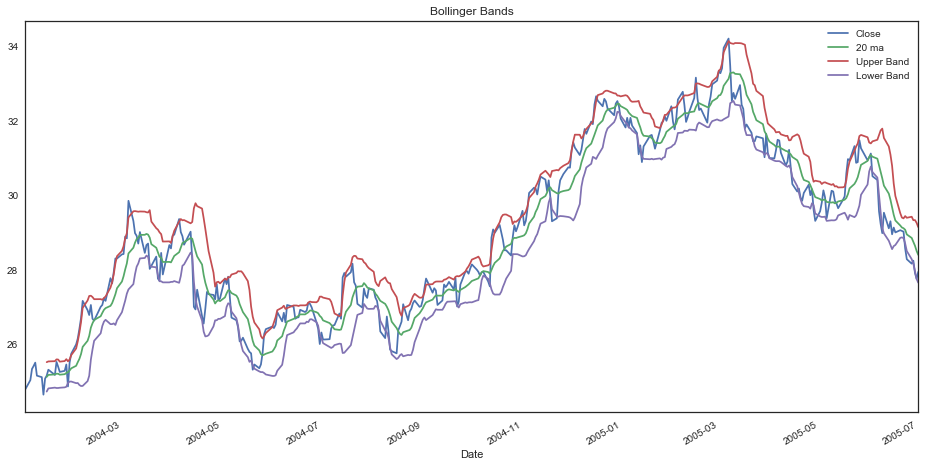

In [75]:
df['20 ma'] = pd.stats.moments.rolling_mean(df['Close'],10)
df['20 sd'] = pd.stats.moments.rolling_std(df['Close'],10)
df['Upper Band'] = df['20 ma'] + (df['20 sd']*1.5)
df['Lower Band'] = df['20 ma'] - (df['20 sd']*1.5)
df.plot(y=['Close','20 ma', 'Upper Band', 'Lower Band'], title='Bollinger Bands',figsize=(16, 8))
#df[["Open", "High", "Low", "Close"]].transpose().plot.box(figsize=(11, 8))

In [76]:
import talib as ta
import pandas_datareader.data as web
import pyalgotrade.strategy as strategy

In [77]:
# Google Finance
# No Adjusted Close Prices
mcd = web.DataReader('MCD', 'google', '2004-01-01', '2005-07-01')
mcd['Adj Close'] = mcd['Close']

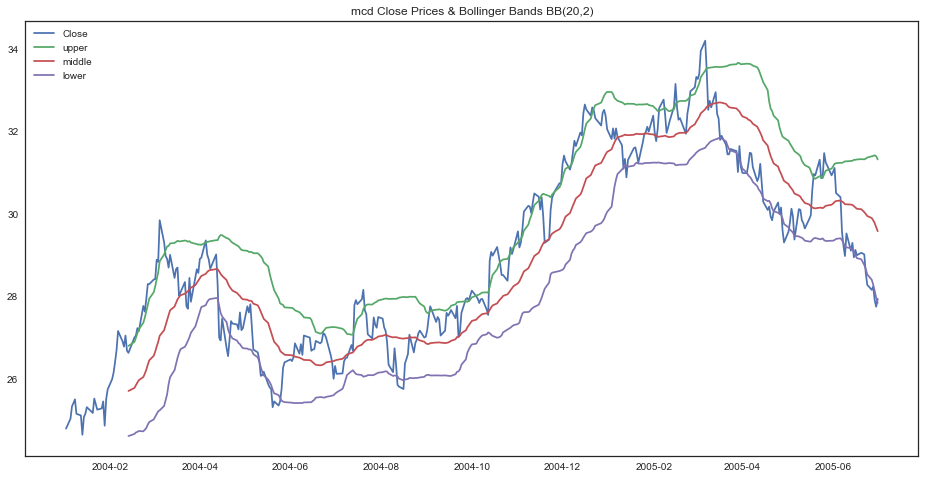

In [80]:
# 2. Bollinger Bands BB(20,2) Calculation and Chart

# Technical Indicator Calculation
mcd['upper'], mcd['middle'], mcd['lower'] = ta.BBANDS(np.asarray(mcd['Close']),
                                                     timeperiod=30, nbdevup=1.5, nbdevdn=1.5, matype=0)
# Technical Indicator Chart
fig1, ax = plt.subplots(figsize=(16, 8))
ax.plot(mcd['Close'])
ax.plot(mcd['upper'])
ax.plot(mcd['middle'])
ax.plot(mcd['lower'])
plt.title('mcd Close Prices & Bollinger Bands BB(20,2)')
plt.legend(loc='upper left')
plt.show()

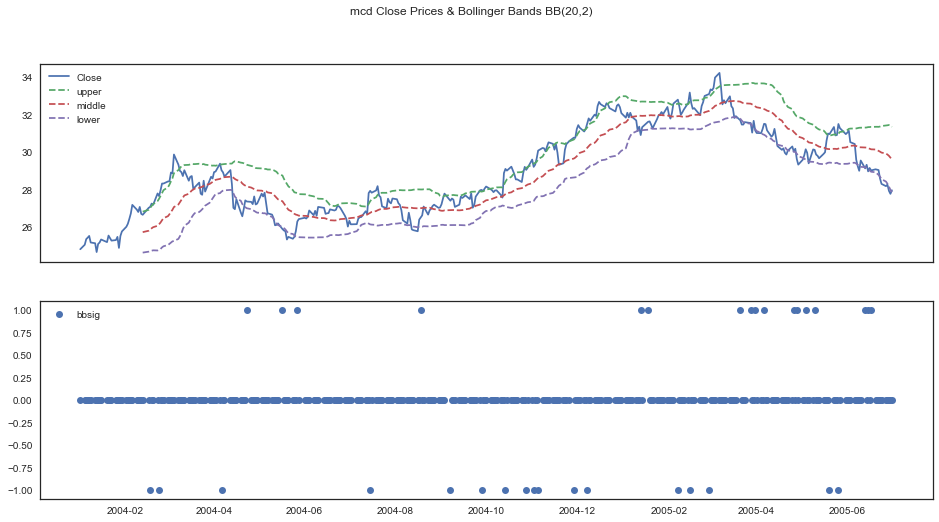

In [81]:
# 3. Bands Crossover Trading Signals
# Previous Periods Data (avoid back-testing bias)
mcd['Close(-1)'] = mcd['Close'].shift(1)
mcd['lower(-1)'] = mcd['lower'].shift(1)
mcd['upper(-1)'] = mcd['upper'].shift(1)
mcd['Close(-2)'] = mcd['Close'].shift(2)
mcd['lower(-2)'] = mcd['lower'].shift(2)
mcd['upper(-2)'] = mcd['upper'].shift(2)

# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
mcd['bbsig'] = 0
bbsig = 0
for i, r in enumerate(mcd.iterrows()):
    if r[1]['Close(-2)'] < r[1]['lower(-2)'] and r[1]['Close(-1)'] > r[1]['lower(-1)']:
        bbsig = 1
    elif r[1]['Close(-2)'] < r[1]['upper(-2)'] and r[1]['Close(-1)'] > r[1]['upper(-1)']:
        bbsig = -1
    else:
        bbsig = 0
    mcd.iloc[i, 15] = bbsig
    
# Trading Signals Chart
fig2, ax = plt.subplots(2, sharex=True, figsize=(16, 8))
ax[0].plot(mcd['Close'])
ax[0].plot(mcd['upper'], linestyle='--')
ax[0].plot(mcd['middle'], linestyle='--')
ax[0].plot(mcd['lower'], linestyle='--')
ax[0].legend(loc='upper left')
ax[1].plot(mcd['bbsig'], marker='o', linestyle='')
ax[1].legend(loc='upper left')
plt.suptitle('mcd Close Prices & Bollinger Bands BB(20,2)')
plt.show()

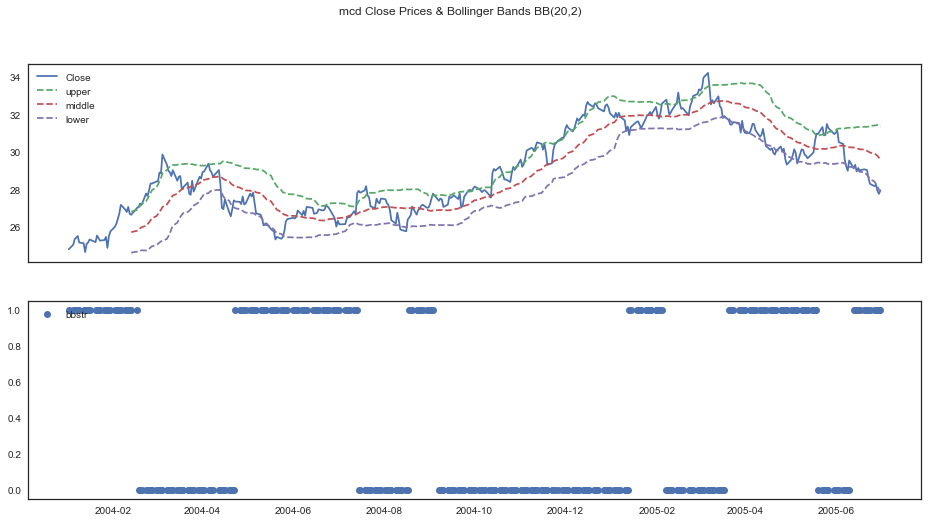

In [82]:
# 4. Bands Crossover Trading Strategy
# Generate Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
mcd['bbstr'] = 1
bbstr = 0
for i, r in enumerate(mcd.iterrows()):
    if r[1]['bbsig'] == 1:
        bbstr = 1
    elif r[1]['bbsig'] == -1:
        bbstr = 0
    else:
        bbstr = mcd['bbstr'][i-1]
    mcd.iloc[i, 16] = bbstr
    
# Trading Strategy Chart
fig3, ax = plt.subplots(2, sharex=True,figsize=(16, 8))
ax[0].plot(mcd['Close'])
ax[0].plot(mcd['upper'], linestyle='--')
ax[0].plot(mcd['middle'], linestyle='--')
ax[0].plot(mcd['lower'], linestyle='--')
ax[0].legend(loc='upper left')
ax[1].plot(mcd['bbstr'], marker='o', linestyle='')
ax[1].legend(loc='upper left')
plt.suptitle('mcd Close Prices & Bollinger Bands BB(20,2)')
plt.show()

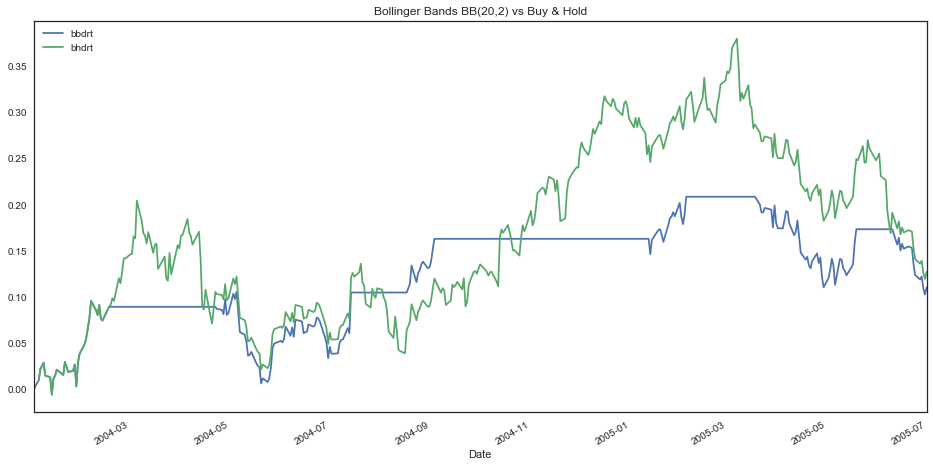

In [87]:
# 5.1. Strategies Daily Returns
# Bands Crossover Strategy Without Trading Commissions
mcd['bbdrt'] = ((mcd['Close']/mcd['Close'].shift(1))-1)*mcd['bbstr']
mcd.iloc[0, 17] = 0

# Buy and Hold Strategy
mcd['bhdrt'] = (mcd['Close']/mcd['Close'].shift(1))-1
mcd.iloc[0, 17] = 0

# Cumulative Returns Calculation
mcd['bbdrt'] = np.cumprod(mcd['bbdrt']+1)-1
mcd['bhdrt'] = np.cumprod(mcd['bhdrt']+1)-1

# Cumulative Returns Chart
mcd.plot(y=['bbdrt','bhdrt'],figsize=(16, 8))
plt.title('Bollinger Bands BB(20,2) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

In [91]:
# 5.3. Strategies Performance Metrics
# Annualized Returns
bbdrt = mcd.iloc[0, 17]
bhdrt = mcd.iloc[0, 17]

# Annualized Standard Deviation
bbstd = np.std(mcd['bbdrt'])*np.sqrt(252)
bhstd = np.std(mcd['bhdrt'])*np.sqrt(252)

# Annualized Sharpe Ratio
bbsr = bbdrt/bbstd
bhsr = bhdrt/bhstd

# Summary Results Data Table
data = [{'0': '', '1': 'BB(20,2)', '2': 'B&H'},
        {'0': 'Annualized Return', '1': bbdrt, '2': bhdrt},
        {'0': 'Annualized Standard Deviation', '1': bbstd, '2': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': bbsr, '2': bhsr}]
table = pd.DataFrame(data)
print(mcd)
print(table)

             Open   High    Low  Close    Volume  Adj Close      upper  \
Date                                                                     
2004-01-02  24.90  25.03  24.66  24.79   4576000      24.79        NaN   
2004-01-05  24.81  25.10  24.80  25.03   5455100      25.03        NaN   
2004-01-06  25.02  25.48  24.96  25.33   5231400      25.33        NaN   
2004-01-07  25.33  25.45  25.13  25.41   6676100      25.41        NaN   
2004-01-08  25.50  25.50  25.50  25.50         0      25.50        NaN   
2004-01-09  25.28  25.55  25.15  25.15   4602300      25.15        NaN   
2004-01-12  25.03  25.15  24.71  25.11   5013800      25.11        NaN   
2004-01-13  25.02  25.12  24.54  24.64   5628300      24.64        NaN   
2004-01-14  24.80  25.09  24.77  25.07   6205000      25.07        NaN   
2004-01-15  25.00  25.48  24.75  25.15   5404100      25.15        NaN   
2004-01-16  25.60  25.35  25.00  25.31   4683300      25.31        NaN   
2004-01-20  25.40  25.50  24.96  25.17